# Rideshare Analysis

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Read csv
path_city = os.path.join('data', 'city_data.csv')
path_ride = os.path.join('data', 'ride_data.csv')

df_city = pd.read_csv(path_city)
df_ride = pd.read_csv(path_ride)

# Merge dataframes
df = pd.merge(df_ride, df_city, how="left", on=["city", "city"])

df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Create group based on the values in the "city" column
group_city = df.groupby(['city'])

# Calculate Average Fare ($) Per City
average_fare = group_city['fare'].mean()

# Calculate Total Number of Rides Per City
total_rides = group_city['ride_id'].nunique()

# Calculate Total Number of Drivers Per City
total_drivers = group_city['driver_count'].max()

# Determine City Type 
city_type = group_city['type'].max()

# Create dataframe with results
summary_city = pd.DataFrame({'Average Fare ($)': average_fare,
                          'Total Number of Rides': total_rides,
                          'Total Number of Drivers': total_drivers,
                          'City Type': city_type})

summary_city.head()

,Average Fare ($),City Type,Total Number of Drivers,Total Number of Rides
city,,,,
Alvarezhaven,23.928710,Urban,21,31
Alyssaberg,20.609615,Urban,67,26
Anitamouth,37.315556,Suburban,16,9
Antoniomouth,23.625000,Urban,21,22
Aprilchester,21.981579,Urban,49,19


In [4]:
# Group by City Type
# Urban
urban = summary_city.loc[summary_city['City Type'] == 'Urban']
total_rides_urban = urban['Total Number of Rides']
avg_fare_urban = urban['Average Fare ($)']
total_drivers_urban = urban['Total Number of Drivers']

# Suburban
suburban = summary_city.loc[summary_city['City Type'] == 'Suburban']
total_rides_suburban = suburban['Total Number of Rides']
avg_fare_suburban = suburban['Average Fare ($)']
total_drivers_suburban = suburban['Total Number of Drivers']

# Rural
rural = summary_city.loc[summary_city['City Type'] == 'Rural']
total_rides_rural = rural['Total Number of Rides']
avg_fare_rural = rural['Average Fare ($)']
total_drivers_rural = rural['Total Number of Drivers']

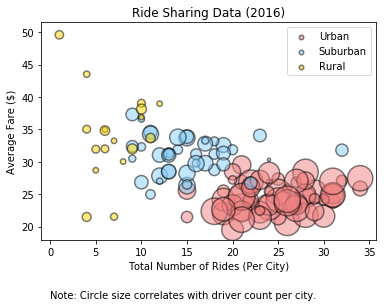

In [5]:
# Use the scatter function
plt.figure()
urban_plot = plt.scatter(total_rides_urban, avg_fare_urban, s=total_drivers_urban*10, 
                         color='lightcoral', alpha=0.5, edgecolor='black', linewidths=1.5, 
                         label='Urban')
suburban_plot = plt.scatter(total_rides_suburban, avg_fare_suburban, s=total_drivers_suburban*10, 
                            color='lightskyblue', alpha=0.5, edgecolor='black',linewidths=1.5, 
                            label='Suburban')
rural_plot = plt.scatter(total_rides_rural, avg_fare_rural, s=total_drivers_rural*10, 
                         color='gold', alpha=0.5, edgecolor='black',linewidths=1.5, 
                         label='Rural')

# Incorporate a text label regarding circle size
plt.text(0, 9, "Note: Circle size correlates with driver count per city.")

# label chart and add grid
plt.title('Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Add and format legend
lgnd = plt.legend(handles=[urban_plot,suburban_plot,rural_plot], loc ='upper right')
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]

# Save Figure
plt.savefig("images/ride_share.png")

plt.show()

## Total Fares by City Type

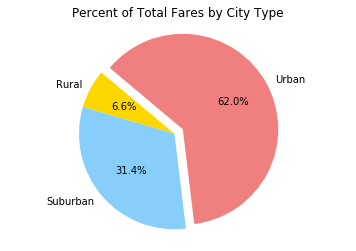

,Total Fare Per Type,Percentage
type,,
Rural,4255.09,6.579786
Suburban,20335.69,31.445750
Urban,40078.34,61.974463


In [6]:
# Group by city type
group_type = df.groupby(['type'])

# Calculate total fare per city type
total_fare_all = group_type['fare'].sum()
total_fare_df = pd.DataFrame({'Total Fare Per Type': total_fare_all})

# Calculate percent of each city type
percent_fare_per_type = total_fare_df['Total Fare Per Type'] / total_fare_df['Total Fare Per Type'].sum() * 100 
percentages_fare_df = pd.DataFrame({'Percentage': percent_fare_per_type})

# Summarize
percent_fare_type = pd.merge(total_fare_df, percentages_fare_df, right_index=True, left_index=True)

percent_fare_rural = percent_fare_type.iloc[0][1]
percent_fare_suburban = percent_fare_type.iloc[1][1]
percent_fare_urban = percent_fare_type.iloc[2][1]

# User bar chart
fare_explode = [0, 0, 0.1]
fare_labels = ['Rural', 'Suburban', 'Urban']
percents_fare = [percent_fare_rural, percent_fare_suburban, percent_fare_urban]
fare_colors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(percents_fare, labels=fare_labels, colors=fare_colors, explode=fare_explode, 
        autopct="{0:1.1f}%".format, shadow=False, startangle=140)
plt.title('Percent of Total Fares by City Type')
plt.axis("equal")

# Save Figure
plt.savefig("images/total_fares.png")

plt.show()
percent_fare_type

## Total Rides by City Type

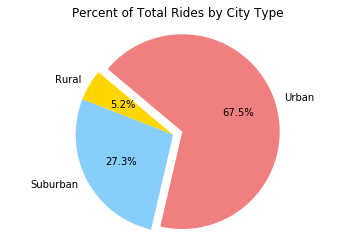

,Total Rides Per Type,Percentage
type,,
Rural,125,5.193187
Suburban,657,27.295388
Urban,1625,67.511425


In [7]:
# Calculate total rides per city type
total_rides_all = group_type['ride_id'].count()
total_rides_df = pd.DataFrame({'Total Rides Per Type': total_rides_all})

# Calculate percent of each city type
percent_rides_per_type = total_rides_df['Total Rides Per Type'] / total_rides_df['Total Rides Per Type'].sum() * 100 
percentages_rides_df = pd.DataFrame({'Percentage': percent_rides_per_type})

# Summarize
percent_rides_type = pd.merge(total_rides_df, percentages_rides_df, right_index=True, left_index=True)

percent_rides_rural = percent_rides_type.iloc[0][1]
percent_rides_suburban = percent_rides_type.iloc[1][1]
percent_rides_urban = percent_rides_type.iloc[2][1]

# User bar chart
rides_explode = [0, 0, 0.1]
rides_labels = ['Rural', 'Suburban', 'Urban']
percents_rides = [percent_rides_rural, percent_rides_suburban, percent_rides_urban]
rides_colors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(percents_rides, labels=rides_labels, colors=rides_colors, explode=rides_explode, 
        autopct="{0:1.1f}%".format, shadow=False, startangle=140)
plt.title('Percent of Total Rides by City Type')
plt.axis("equal")

# Save Figure
plt.savefig("images/total_rides.png")

plt.show()
percent_rides_type

## Total Drivers by City Type

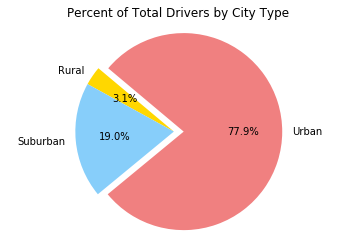

In [8]:
# Calculate total drivers and total drivers by city type
urban_driver = summary_city.loc[summary_city['City Type']=='Urban'].sum()['Total Number of Drivers']
suburban_driver = summary_city.loc[summary_city['City Type']=='Suburban'].sum()['Total Number of Drivers']
rural_driver = summary_city.loc[summary_city['City Type']=='Rural'].sum()['Total Number of Drivers']
total_drivers = summary_city['Total Number of Drivers'].sum()

# Calculate percent of each city type
percent_urban_driver = urban_driver / total_drivers * 100
percent_suburban_driver = suburban_driver / total_drivers * 100
percent_rural_driver = rural_driver / total_drivers * 100

# User bar chart
drivers_explode = [0, 0, 0.1]
drivers_labels = ['Rural', 'Suburban', 'Urban']
percents_drivers = [percent_rural_driver, percent_suburban_driver, percent_urban_driver]
drivers_colors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(percents_drivers, labels=drivers_labels, colors=drivers_colors, explode=drivers_explode, 
        autopct="{0:1.1f}%".format, shadow=False, startangle=140)
plt.title('Percent of Total Drivers by City Type')
plt.axis("equal")

# Save Figure
plt.savefig("images/total_drivers.png")

plt.show()